In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
import torchvision
import torchvision.transforms as transforms

from PIL import Image

In [164]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [165]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [166]:
torch.cuda.is_available()

True

In [167]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


#### Download data

In [168]:
california_housing_dataset = fetch_california_housing(data_home='D:/Data/Study/scikit_learn_data', as_frame=True)

In [169]:
california_housing_dataset['frame'].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [170]:
california_housing_dataset['frame'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [171]:
# Split training set and test set
X_train, X_test, y_train, y_test = train_test_split(california_housing_dataset.data, california_housing_dataset.target,
                                                    test_size = 0.25, random_state = 13)

In [172]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5707,3.5174,36.0,4.547945,1.094368,1357.0,2.065449,34.21,-118.23
3754,2.9728,36.0,4.299465,0.997326,1217.0,3.254011,34.18,-118.37
11866,1.6944,11.0,21.372093,4.627907,69.0,1.604651,40.19,-121.08
19325,3.7143,49.0,6.201087,1.298913,505.0,2.744565,38.53,-122.94
1962,2.9219,17.0,6.113960,1.128205,862.0,2.455840,38.73,-120.71
...,...,...,...,...,...,...,...,...
153,4.7708,52.0,6.727700,1.075117,612.0,2.873239,37.81,-122.23
866,5.2879,12.0,5.410596,1.006623,3436.0,3.250710,37.57,-122.04
74,2.4830,20.0,6.278195,1.210526,290.0,2.180451,37.81,-122.29
14512,6.0891,5.0,5.469595,0.918919,1063.0,3.591216,32.91,-117.16


In [173]:
y_train

5707     2.680
3754     1.902
11866    1.375
19325    1.488
1962     1.413
         ...  
153      3.147
866      2.312
74       1.375
14512    2.146
338      0.889
Name: MedHouseVal, Length: 15480, dtype: float64

In [174]:
# Data Standardization
scale = StandardScaler()
X_train_s = scale.fit_transform(X_train)
X_test_s = scale.transform(X_test)

In [175]:
# Transform training data to data table
house_data = pd.DataFrame(data=X_train_s, columns = california_housing_dataset.feature_names)
house_data['target'] = y_train
house_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,-0.181483,0.579137,-0.340021,-0.004463,-0.065383,-0.087113,-0.671762,0.675607,4.526
1,-0.468327,0.579137,-0.436304,-0.200565,-0.187060,0.012248,-0.685728,0.605994,3.585
2,-1.141668,-1.409735,6.179161,7.136066,-1.184805,-0.125634,2.112156,-0.741514,3.521
3,-0.077775,1.613350,0.300554,0.408878,-0.805871,-0.030340,1.339362,-1.666371,NaN
4,-0.495137,-0.932406,0.266794,0.063914,-0.495596,-0.054477,1.432470,-0.557537,3.422
...,...,...,...,...,...,...,...,...,...
15475,0.478689,1.852015,0.504611,-0.043365,-0.712875,-0.019584,1.004175,-1.313334,1.328
15476,0.751049,-1.330180,-0.005753,-0.181779,1.741510,0.011972,0.892446,-1.218859,NaN
15477,-0.726308,-0.693741,0.330433,0.230267,-0.992731,-0.077499,1.004175,-1.343168,1.599
15478,1.173046,-1.887064,0.017109,-0.359009,-0.320904,0.040437,-1.276962,1.207649,NaN


In [176]:
# Turn the data set to a sheet
X_train_t = torch.from_numpy(X_train_s.astype(np.float32)).to(device)
y_train_t = torch.from_numpy(y_train.values.astype(np.float32)).to(device)
X_test_t = torch.from_numpy(X_test_s.astype(np.float32)).to(device)
y_test_t = torch.from_numpy(y_test.values.astype(np.float32)).to(device)

In [177]:
# Process the training data as a data loader
train_data = Data.TensorDataset(X_train_t, y_train_t)
test_data = Data.TensorDataset(X_test_t, y_test_t)
train_loader = Data.DataLoader(dataset = train_data, 
                               batch_size = 64, 
                               shuffle = True)

In [178]:
train_data[0]

(tensor([-0.1815,  0.5791, -0.3400, -0.0045, -0.0654, -0.0871, -0.6718,  0.6756],
        device='cuda:0'),
 tensor(2.6800, device='cuda:0'))

#### Build a network predict price

In [179]:
class Perceptron(nn.Module):
    def __init__(self, input_dim=8, output_dim=100, activation="relu"):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim, bias=True)
        self.activation = activation
        
    def forward(self, x):
        x = self.fc(x)
        if self.activation=="relu":
            return F.relu(x)
        if self.activation=="sigmoid":
            return F.sigmoid(x)
        raise RuntimeError

In [180]:
class FeedForward(nn.Module):
    def __init__(self, input_dim=8, hidden_dim=100):
        super(FeedForward, self).__init__()
        self.bn1 = nn.BatchNorm1d(input_dim)
        self.fc1 = Perceptron(input_dim, hidden_dim)
        #self.bn2 = nn.BatchNorm1d(hidden_dim)
        self.dp1 = nn.Dropout(0.25)
        self.fc2 = Perceptron(hidden_dim, hidden_dim // 2)
        #self.bn3 = nn.BatchNorm1d(hidden_dim // 2)
        self.dp2 = nn.Dropout(0.25)
        self.fc3 = Perceptron(hidden_dim // 2, 1)
        
    def forward(self, x):
        x = self.bn1(x)
        x = self.fc1(x)
        #x = self.bn2(x)
        x = self.dp1(x)
        x = self.fc2(x)
        #x = self.bn3(x)
        x = self.dp2(x)
        x = self.fc3(x)
        return x

In [181]:
net = FeedForward().to(device)

In [150]:
# Define an optimizer
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)
loss_func = nn.MSELoss() #            
train_loss_all = []

#  total EPOCH Wheel
for epoch in range(30):
    train_loss = 0
    train_num = 0
    # Iterate the loader of the training data
    for step, (b_x, b_y) in enumerate(train_loader):
        output = net(b_x) # Output on training BATCH
        loss = loss_func(output, b_y) #      
        optimizer.zero_grad() # Each iterative gradient initializes 0
        loss.backward() #Nushby, calculate gradient
        optimizer.step() # Optimize using gradients
        train_loss += loss.item() * b_x.size(0)
        train_num += b_x.size(0)
    train_loss_all.append(train_loss / train_num)

C:\Users\xiaomi\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\xiaomi\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


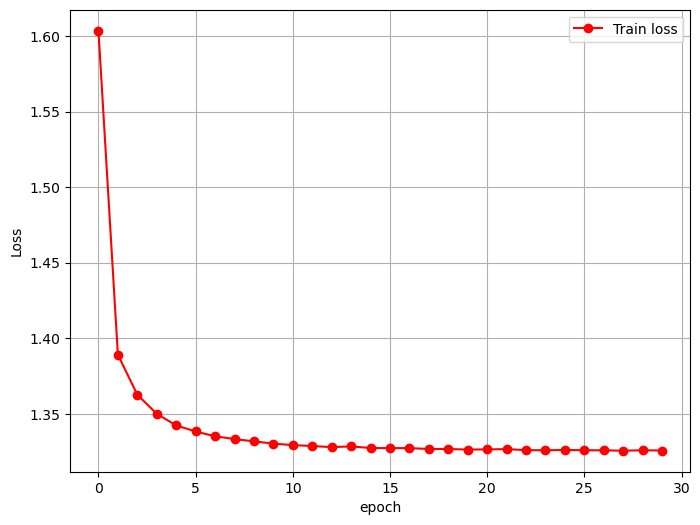

In [151]:
plt.figure(figsize = (8, 6))
plt.plot(train_loss_all, 'ro-', label = 'Train loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

In [152]:
y_pre = net(X_test_t)
y_pre = y_pre.data.cpu().numpy()
mae = mean_absolute_error(y_test, y_pre)
print('The absolute value error on the test set is:', mae)

The absolute value error on the test set is: 0.9200616847915725


In [182]:
# Define an optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss_func = nn.MSELoss() #            
train_loss_all = []

#  total EPOCH Wheel
for epoch in range(30):
    train_loss = 0
    train_num = 0
    # Iterate the loader of the training data
    for step, (b_x, b_y) in enumerate(train_loader):
        output = net(b_x) # Output on training BATCH
        loss = loss_func(output, b_y) #      
        optimizer.zero_grad() # Each iterative gradient initializes 0
        loss.backward() #Nushby, calculate gradient
        optimizer.step() # Optimize using gradients
        train_loss += loss.item() * b_x.size(0)
        train_num += b_x.size(0)
    train_loss_all.append(train_loss / train_num)

C:\Users\xiaomi\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\xiaomi\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [183]:
y_pre = net(X_test_t)
y_pre = y_pre.data.cpu().numpy()
mae = mean_absolute_error(y_test, y_pre)
print('The absolute value error on the test set is:', mae)

The absolute value error on the test set is: 0.9151934899021046


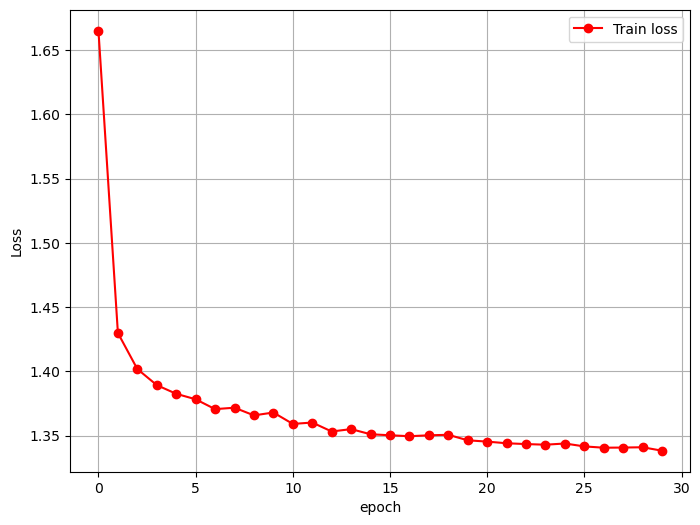

In [184]:
plt.figure(figsize = (8, 6))
plt.plot(train_loss_all, 'ro-', label = 'Train loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

In [186]:
# Define an optimizer
optimizer = torch.optim.RMSprop(net.parameters(), lr=0.01)
loss_func = nn.MSELoss() #            
train_loss_all = []

#  total EPOCH Wheel
for epoch in range(30):
    train_loss = 0
    train_num = 0
    # Iterate the loader of the training data
    for step, (b_x, b_y) in enumerate(train_loader):
        output = net(b_x) # Output on training BATCH
        loss = loss_func(output, b_y) #      
        optimizer.zero_grad() # Each iterative gradient initializes 0
        loss.backward() #Nushby, calculate gradient
        optimizer.step() # Optimize using gradients
        train_loss += loss.item() * b_x.size(0)
        train_num += b_x.size(0)
    train_loss_all.append(train_loss / train_num)

C:\Users\xiaomi\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\xiaomi\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


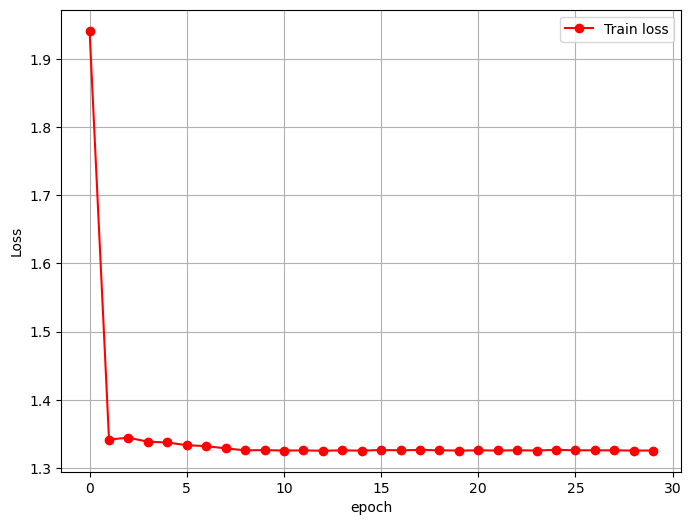

In [187]:
plt.figure(figsize = (8, 6))
plt.plot(train_loss_all, 'ro-', label = 'Train loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

In [188]:
y_pre = net(X_test_t)
y_pre = y_pre.data.cpu().numpy()
mae = mean_absolute_error(y_test, y_pre)
print('The absolute value error on the test set is:', mae)

The absolute value error on the test set is: 0.9283354029791779


In [189]:
class Pregression(nn.Module):
    def __init__(self):
        super(Pregression, self).__init__()
        #        
        self.hidden1 = nn.Linear(in_features=8, out_features=100, bias=True)
        #        
        self.hidden2 = nn.Linear(100, 100)
        # Third implicit layers
        self.hidden3 = nn.Linear(100, 50)
        #      
        self.predict = nn.Linear(50, 1)
        
    # Defines the path forward propagation path
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        output = self.predict(x)
        # Output a one-dimensional vector
        return output[:, 0]


In [193]:
from torchsummary import summary
net_without_bd = Pregression().to(device)
summary(net_without_bd, input_size=(1, 8))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]             900
            Linear-2               [-1, 1, 100]          10,100
            Linear-3                [-1, 1, 50]           5,050
            Linear-4                 [-1, 1, 1]              51
Total params: 16,101
Trainable params: 16,101
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.06
Estimated Total Size (MB): 0.06
----------------------------------------------------------------


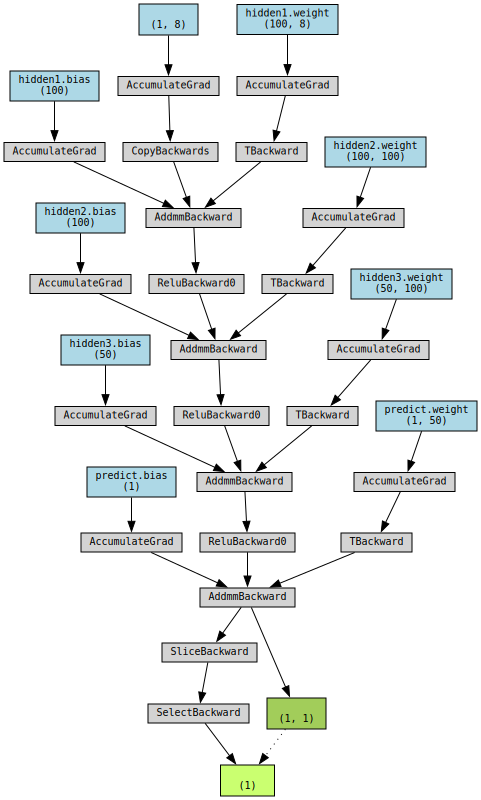

In [196]:
# Output network structure
from torchviz import make_dot
x = torch.randn(1, 8).requires_grad_(True).to(device)
y = net_without_bd(x)
myMLP_vis = make_dot(yФ, params=dict(list(net_without_bd.named_parameters()) + [('x', x)]))
myMLP_vis


In [197]:
# Define an optimizer
optimizer = torch.optim.Adam(net_without_bd.parameters(), lr = 0.01)
loss_func = nn.MSELoss() #            
train_loss_all = []

#  , total EPOCH Wheel
for epoch in range(30):
    train_loss = 0
    train_num = 0
    # Iterate the loader of the training data
    for step, (b_x, b_y) in enumerate(train_loader):
        output = net_without_bd(b_x) # Mlp Output on training BATCH
        loss = loss_func(output, b_y) #      
        optimizer.zero_grad() # Each iterative gradient initializes 0
        loss.backward() #Nushby, calculate gradient
        optimizer.step() # Optimize using gradients
        train_loss += loss.item() * b_x.size(0)
        train_num += b_x.size(0)
    train_loss_all.append(train_loss / train_num)

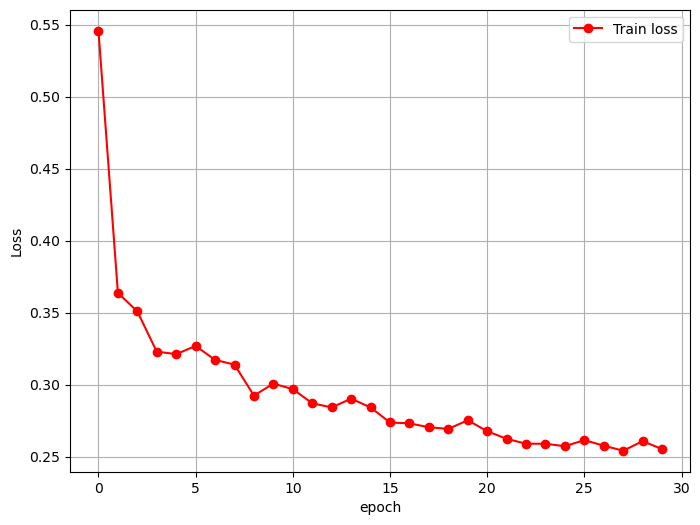

In [198]:
plt.figure(figsize = (8, 6))
plt.plot(train_loss_all, 'ro-', label = 'Train loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

In [200]:
y_pre = net_without_bd(X_test_t)
y_pre = y_pre.data.cpu().numpy()
mae = mean_absolute_error(y_test, y_pre)
print('The absolute value error on the test set is:', mae)

The absolute value error on the test set is: 0.359693165039946


### Без Dropout, BatchNorm1d сеть обучается лучше. 

### Adam -> SGD -> RMSprop оптимизаторы раставлены в порядке увеличение ошибки